In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# data
данные обновлены 29.11.2023
- t  - температура
- p  - давление
- cloud - облачность
- precip - осадки/гроза
- wdir - направление ветра
- ws - скорость ветра 
<br> метка **d** в конце названия столбца указывает что данные **дневные**
<br> метка **n** в конце названия столбца указывает что данные **ночные**

In [3]:
data = pd.read_csv('data.csv', index_col='id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     8912 non-null   int64  
 1   month    8912 non-null   int64  
 2   day      8912 non-null   int64  
 3   td       8897 non-null   float64
 4   pd       8897 non-null   float64
 5   cloudd   8888 non-null   object 
 6   precipd  1342 non-null   object 
 7   wdird    8897 non-null   object 
 8   wsd      8897 non-null   float64
 9   tn       8884 non-null   float64
 10  pn       8884 non-null   float64
 11  cloudn   8873 non-null   object 
 12  precipn  1189 non-null   object 
 13  wdirn    8884 non-null   object 
 14  wsn      8884 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


**словари для меток координатных осей**

In [4]:
months = ['Ja', 'Fe', 'Ma', 'Ap', 'May', 'June', 'July', 'Au', 'Se', 'Oc', 'No', 'De']
dictmonth = {1: {'a': 'Ян', 'f': 'Январь'}, 
             2: {'a': 'Фе', 'f': 'Февраль'}, 
             3: {'a': 'Март', 'f': 'Март'},
             4: {'a': 'Ап', 'f': 'Апрель'},
             5: {'a': 'Май', 'f': 'Май'},
             6: {'a': 'Июнь', 'f': 'Июнь'},
             7: {'a': 'Июль', 'f': 'Июль'},
             8: {'a': 'Ав', 'f': 'Август'},
             9: {'a': 'Се', 'f': 'Сентябрь'}, 
            10: {'a': 'Ок', 'f': 'Октябрь'},
            11: {'a': 'Но', 'f': 'Ноябрь'},
            12: {'a': 'Де', 'f': 'Декабрь'}}
colors = ['#E7EB0A', '#1AD90D',
          '#0722ED', '#a064b0', '#117E7D',
          '#77877C',
          '#E11414', '#E4800F', '#7E7711']
seasons = ['зима', 'весна', 'лето', 'осень']
directs = ["Восточный",'Западный',
           "Северный","Северо-Восточный","Северо-Западный",
           "Штиль",
           "Южный","Юго-Восточный","Юго-Западный"]
shortdirects = ['В', 'З', 'С', 'СВ', 'СЗ', 'Ш', 'Ю', 'ЮВ', 'ЮЗ']

In [33]:
# данные дневного и ночного направлений ветра совпадают в 99.5% случаев
(data.wdird == data.wdirn).mean()

0.9951750448833034

# 1. направление ветра

### 1.1 процентное отношение направлений за все годы

In [6]:
# считаем количество всех ветров
dirall = data.groupby('wdird')\
             .agg(count = ('wdird', 'count'))\
             .sort_index()
# добавляем столбец с процентной популярностью от общего числа
dirall['percent'] = dirall['count'].div(dirall['count'].sum()).mul(100).round(2)

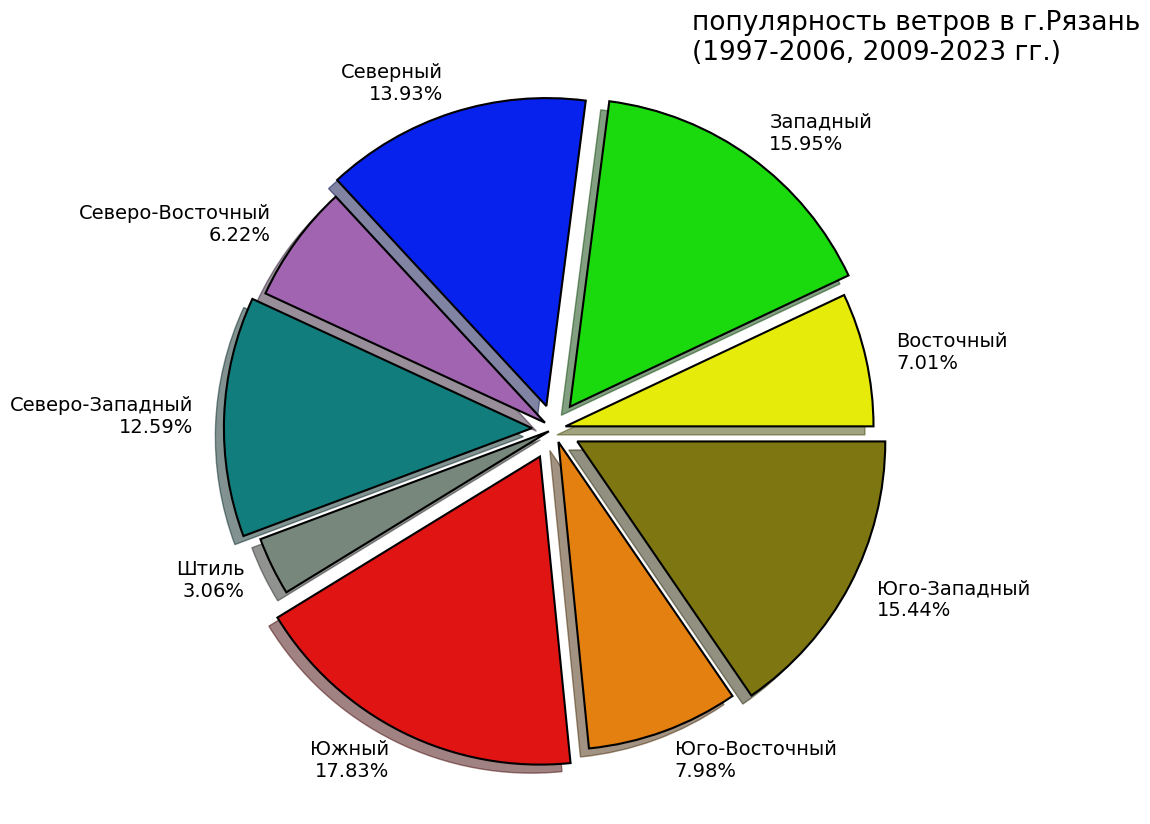

In [7]:
fig1 = plt.figure(figsize=(10, 10))
ax_dirall = fig1.add_subplot()
explode = [(i / max(dirall['count'].values) / 10) for i in dirall['count'].values]
wedges, texts = ax_dirall.pie(dirall['percent'], explode=explode, colors=colors, shadow=True)
for wedge in wedges:
    wedge.set_linewidth(1.5)
    wedge.set_edgecolor('black')

for i in range (len(texts)):
    texts[i].set_fontsize(14)
    dirr, per = directs[i], dirall['percent'].iloc[i]
    texts[i].set_text(f'{dirr}\n{per}%')
ax_dirall.annotate(f'популярность ветров в г.Рязань\n(1997-2006, 2009-2023 гг.)', (0.45, 1.2), fontsize=19);

### 1.2 процентное отношение направлений по каждому году отдельно

###### сохраняем данные по годам(проценты) в json
массив долей(популярности) направлений ветра в каждом году 

In [8]:
# dir_wind_percent_year = pd.DataFrame([], index=shortdirects)
# w_dir_year = data.groupby(['year', 'wdird']).agg(count = ('wdird', 'count')).reset_index()
# w_dir_year_pivot = w_dir_year.pivot(index='wdird', columns='year', values='count')
# for i in w_dir_year_pivot.columns:
#     dir_wind_percent_year[i] = w_dir_year_pivot[i].apply(lambda col: round(col / w_dir_year_pivot[i].sum() * 100, 2))
# dir_wind_percent_year['total'] = dir_wind_percent_year.mean(axis=1).round(2)

In [9]:
# dir_wind_percent_year.to_json('napravlenie_vetrov/new_dir_wind_percent_year.json')

In [10]:
dwpy = pd.read_json('napravlenie_vetrov/new_dir_wind_percent_year.json')

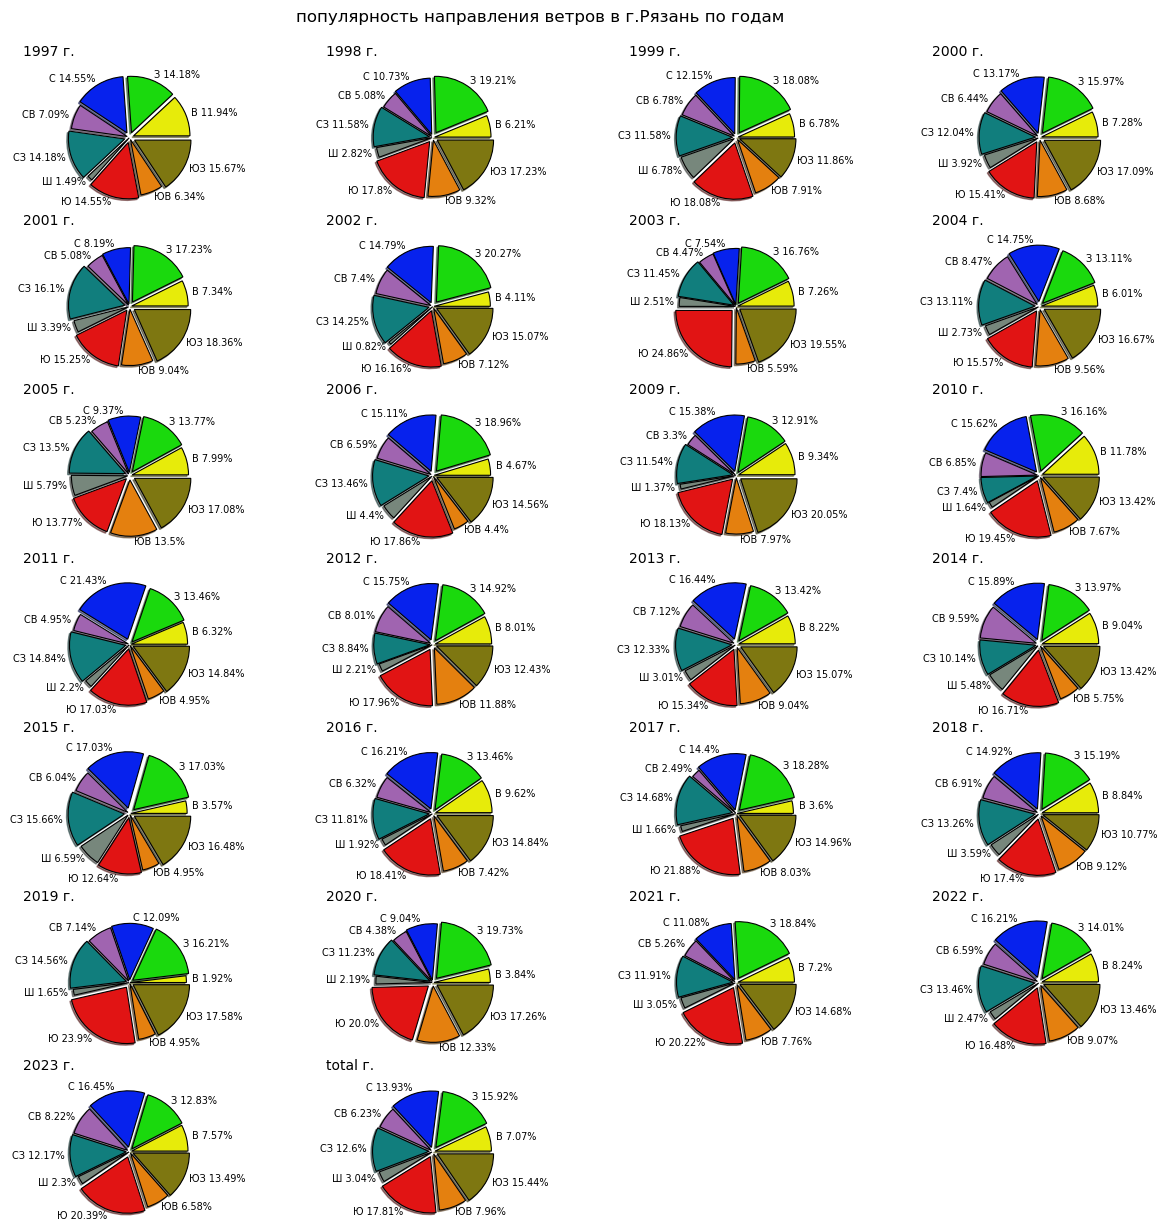

In [11]:
fig2 = plt.figure(figsize=(15, 15))
fig2.text(0.32, 0.91, f'популярность направления ветров в г.Рязань по годам', fontsize=12)
num = 1
for i in dwpy.columns:
    explode = [k / dwpy[i].max() / 10 for k in dwpy[i]]
    ax_dwpy = fig2.add_subplot(7, 4, num)
    wedges, texts = ax_dwpy.pie(dwpy[i], explode=explode, colors=colors, shadow=True)
    for wedge in wedges:
        wedge.set_linewidth(0.8)
        wedge.set_edgecolor('black')
    for t in range (len(texts)):
        texts[t].set_fontsize(7)
        dirr, per = shortdirects[t], dwpy[i].iloc[t].round(2)
        texts[t].set_text(f'{dirr} {per}%')
    ax_dwpy.annotate(f'{i} г.', (0, 0), xytext=(-1.9, 1.45), fontsize=10)    
    num += 1

### 1.3 разброс популярности ветров в процентном отношении по годам

In [12]:
# массив отклонения минимальной и максимальной доли каждого направления от его средней **межгодовой** 'популярности'
wind_percent_spread = [dwpy['total'].values - [dwpy.loc[i].min() for i in shortdirects], 
                      [dwpy.loc[i].max() for i in shortdirects] - dwpy['total'].values]

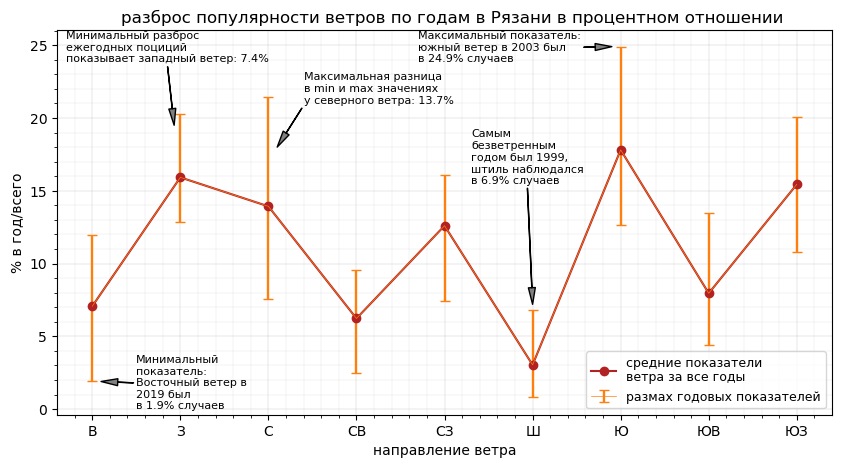

In [13]:
fig3 = plt.figure(figsize=(10, 5))
ax_dwpy = fig3.add_subplot()
ax_dwpy.errorbar(shortdirects, dwpy['total'].values, yerr=wind_percent_spread,\
                 color='#ff7f0e',\
                 ecolor='#ff7f0e',\
                 capsize=3.5,\
                 elinewidth=1.7,\
                 linewidth=0.5,\
                 label='размах годовых показателей')
ax_dwpy.plot(dwpy.total, color = 'firebrick', lw = 1.5, marker='o', label='средние показатели\nветра за все годы')
ax_dwpy.minorticks_on()
ax_dwpy.grid(which='minor', lw=0.1)
ax_dwpy.grid(which='major', lw=0.2)
ax_dwpy.set_xlabel('направление ветра')
ax_dwpy.set_ylabel('% в год/всего')

ax_dwpy.annotate(f'Максимальный показатель:\nюжный ветер в 2003 был\nв 24.9% случаев', \
                xy=(5.9, 24.9), xytext=(3.7, 23.85), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Минимальный\nпоказатель:\nВосточный ветер в\n2019 был\nв 1.9% случаев', \
                xy=(0.1, 1.9), xytext=(0.5, 0), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Максимальная разница\nв min и max значениях\nу северного ветра: 13.7%',\
                 xy=(2.1, 18), xytext=(2.4, 21), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Минимальный разброс\nежегодных поциций\nпоказывает западный ветер: 7.4%',\
                 xy=(0.93, 19.5), xytext=(-0.3, 23.85), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Самым\nбезветренным\nгодом был 1999,\nштиль наблюдался\nв 6.9% случаев',\
                 xy=(5, 7.2), xytext=(4.3, 15.5), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
fig3.suptitle(f'разброс популярности ветров по годам в Рязани в процентном отношении', x=0.52,y=0.92, fontsize=12)
ax_dwpy.legend(loc=4, fontsize=9);

#### процентное отношение направлений по каждому месяцу отдельно

###### сохраняем данные по год-месяц(проценты) в json
массив долей(популярности) направлений ветра в каждом месяце каждого года

In [14]:
# new_dwpym = data.pivot_table(values='day', 
#                              index='wdird', 
#                              columns=['year', 'month'], 
#                              aggfunc='count', 
#                              fill_value=0.0)
# column = []
# for i in new_dwpym.columns:
#     column.append(f'{i[0]}.{i[1]}')
#     new_dwpym[i] = new_dwpym[i].apply(lambda col: round(col/new_dwpym[i].sum()*100, 2))   
# new_dwpym.columns = column    

In [15]:
# new_dwpym.to_json('napravlenie_vetrov/new_dir_wind_percent_year.month.json')

In [16]:
dwpym = pd.read_json('napravlenie_vetrov/new_dir_wind_percent_year.month.json', convert_axes=False)

#### процентное отношение направлений по месяцам

###### сохраняем данные по месяцам в json
массив долей(популярности) направлений ветра в каждом месяце(без привязки к годам)

In [17]:
# # группировка массива с количеством случаев каждого ветра в каждом месяце 
# new_dwpm = data.pivot_table(values='day', 
#                             index='wdird', 
#                             columns=['month'], 
#                             aggfunc='count', 
#                             fill_value=0.0)
# # перевод колличеств в процентное отношение между всеми направлениями
# for i in new_dwpm.columns:
#     new_dwpm[i] = new_dwpm[i].apply(lambda col: round(col/new_dwpm[i].sum()*100, 2))  
# # добавление столбца сосредним значением направления по месяцам
# new_dwpm['total'] = new_dwpm.mean(axis=1).round(2)

In [18]:
# # запись в json
# new_dwpm.to_json('napravlenie_vetrov/new_dir_wind_percent_month.json')

In [19]:
dwpm = pd.read_json('napravlenie_vetrov/new_dir_wind_percent_month.json')

### 1.4 разброс популярности ветров в процентном отношении по месяцам

In [20]:
# массив отклонения минимальной и максимальной доли каждого направления от его средней **межмесячной** 'популярности'
wind_percent_spread = [dwpm['total'].values - [dwpm.loc[i].min() for i in shortdirects],\
                      [dwpm.loc[i].max() for i in shortdirects] - dwpm['total'].values]

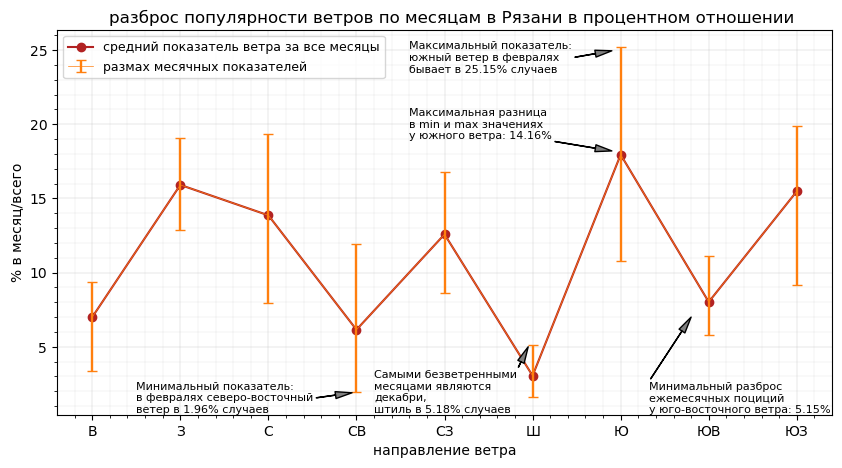

In [21]:
fig4 = plt.figure(figsize=(10, 5))
ax_dwpm = fig4.add_subplot()

ax_dwpm.plot(dwpm.total, color = 'firebrick', lw = 1.5, marker='o', label='средний показатель ветра за все месяцы')
ax_dwpm.errorbar(shortdirects, dwpm['total'].values, yerr=wind_percent_spread,\
                 color='#ff7f0e',\
                 ecolor='#ff7f0e',\
                 elinewidth=1.7,\
                 linewidth=0.5,\
                 capsize=3.5,\
                 label='размах месячных показателей')

ax_dwpm.minorticks_on()
ax_dwpm.grid(which='minor', lw=0.1)
ax_dwpm.grid(which='major', lw=0.2)
ax_dwpm.set_xlabel('направление ветра')
ax_dwpm.set_ylabel('% в месяц/всего')
ax_dwpm.legend(loc=2, fontsize=9)

ax_dwpm.annotate(f'Максимальный показатель:\nюжный ветер в февралях\nбывает в 25.15% случаев', \
                xy=(5.9, 24.95), xytext=(3.6, 23.5), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Минимальный показатель:\nв февралях северо-восточный\nветер в 1.96% случаев', \
                xy=(2.95, 1.9), xytext=(0.5, 0.55), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Максимальная разница\nв min и max значениях\nу южного ветра: 14.16%',\
                 xy=(5.9, 18.2), xytext=(3.6, 19), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Минимальный разброс\nежемесячных поциций\nу юго-восточного ветра: 5.15%',\
                 xy=(6.8, 7), xytext=(6.32, 0.55), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Самыми безветренными\nмесяцами являются\nдекабри,\nштиль в 5.18% случаев',\
                 xy=(4.95, 5), xytext=(3.2, 0.55), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})

fig4.suptitle(f'разброс популярности ветров по месяцам в Рязани в процентном отношении', x=0.52,y=0.92, fontsize=12);

### 1.5 разделение ветров на условные летние/зимние категории

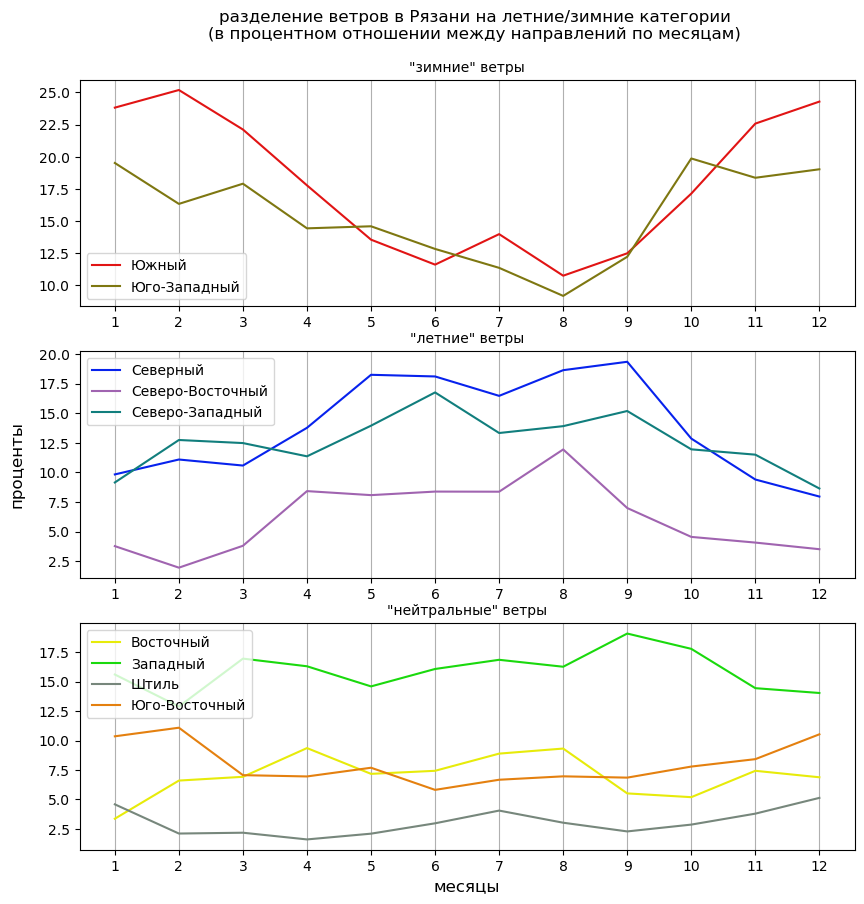

In [22]:
fig5 = plt.figure(figsize=(10, 10))
axwinter = fig5.add_subplot(3, 1, 1)
axsummer = fig5.add_subplot(3, 1, 2)
axneutral = fig5.add_subplot(3, 1, 3)
num = 1
for i in shortdirects:
    if dwpm.loc[i].iloc[[11, 12, 1, 2, 3]].sum() - dwpm.loc[i].iloc[[5, 6, 7, 8, 9]].sum() >= 10:
        axwinter.plot(dwpm.loc[i].iloc[:12],\
                      label=directs[num-1],\
                      color=colors[num-1])
    elif dwpm.loc[i].iloc[[11, 12, 1, 2, 3]].sum() - dwpm.loc[i].iloc[[5, 6, 7, 8, 9]].sum() <= -10:
        axsummer.plot(dwpm.loc[i].iloc[:12],\
                      label=directs[num-1],\
                      color=colors[num-1])
    else:
        axneutral.plot(dwpm.loc[i].iloc[:12],\
                       label=directs[num-1],\
                       color=colors[num-1])
    num += 1    
axwinter.legend(loc=3)
axsummer.legend(loc=2)
axneutral.legend(loc=2)
axwinter.grid(axis='x')
axsummer.grid(axis='x')
axneutral.grid(axis='x')
fig5.suptitle(f'разделение ветров в Рязани на летние/зимние категории\n(в процентном отношении между направлений по месяцам)',\
              x=0.52,y=0.95, fontsize=12)
axsummer.set_ylabel('проценты', fontsize=12, labelpad=10)
axneutral.set_xlabel('месяцы', fontsize=12)
axsummer.set_title(label='"летние" ветры', fontsize=10)
axwinter.set_title(label='"зимние" ветры', fontsize=10)
axneutral.set_title(label='"нейтральные" ветры', fontsize=10);

### формируем данные по направлению за промежуток времени в процентном отношении

### 1.6 каждое направление относительно себя по годам в процентном отношении

In [23]:
# # подсчет количества направлений ветра в годах
# yeardircount = data.pivot_table(values='day', index='year', columns='wdird', aggfunc='count')
# # добавить столбцы с переводом количества случаев в процент
# for i in yeardircount.columns:
#     yeardircount[f'{i}%'] = yeardircount[i].apply(lambda col: round(col/yeardircount[i].sum()*100, 2))   

In [24]:
# yeardircount.to_json('napravlenie_vetrov/new_yeardircount.json')

In [25]:
ydc = pd.read_json('napravlenie_vetrov/new_yeardircount.json')

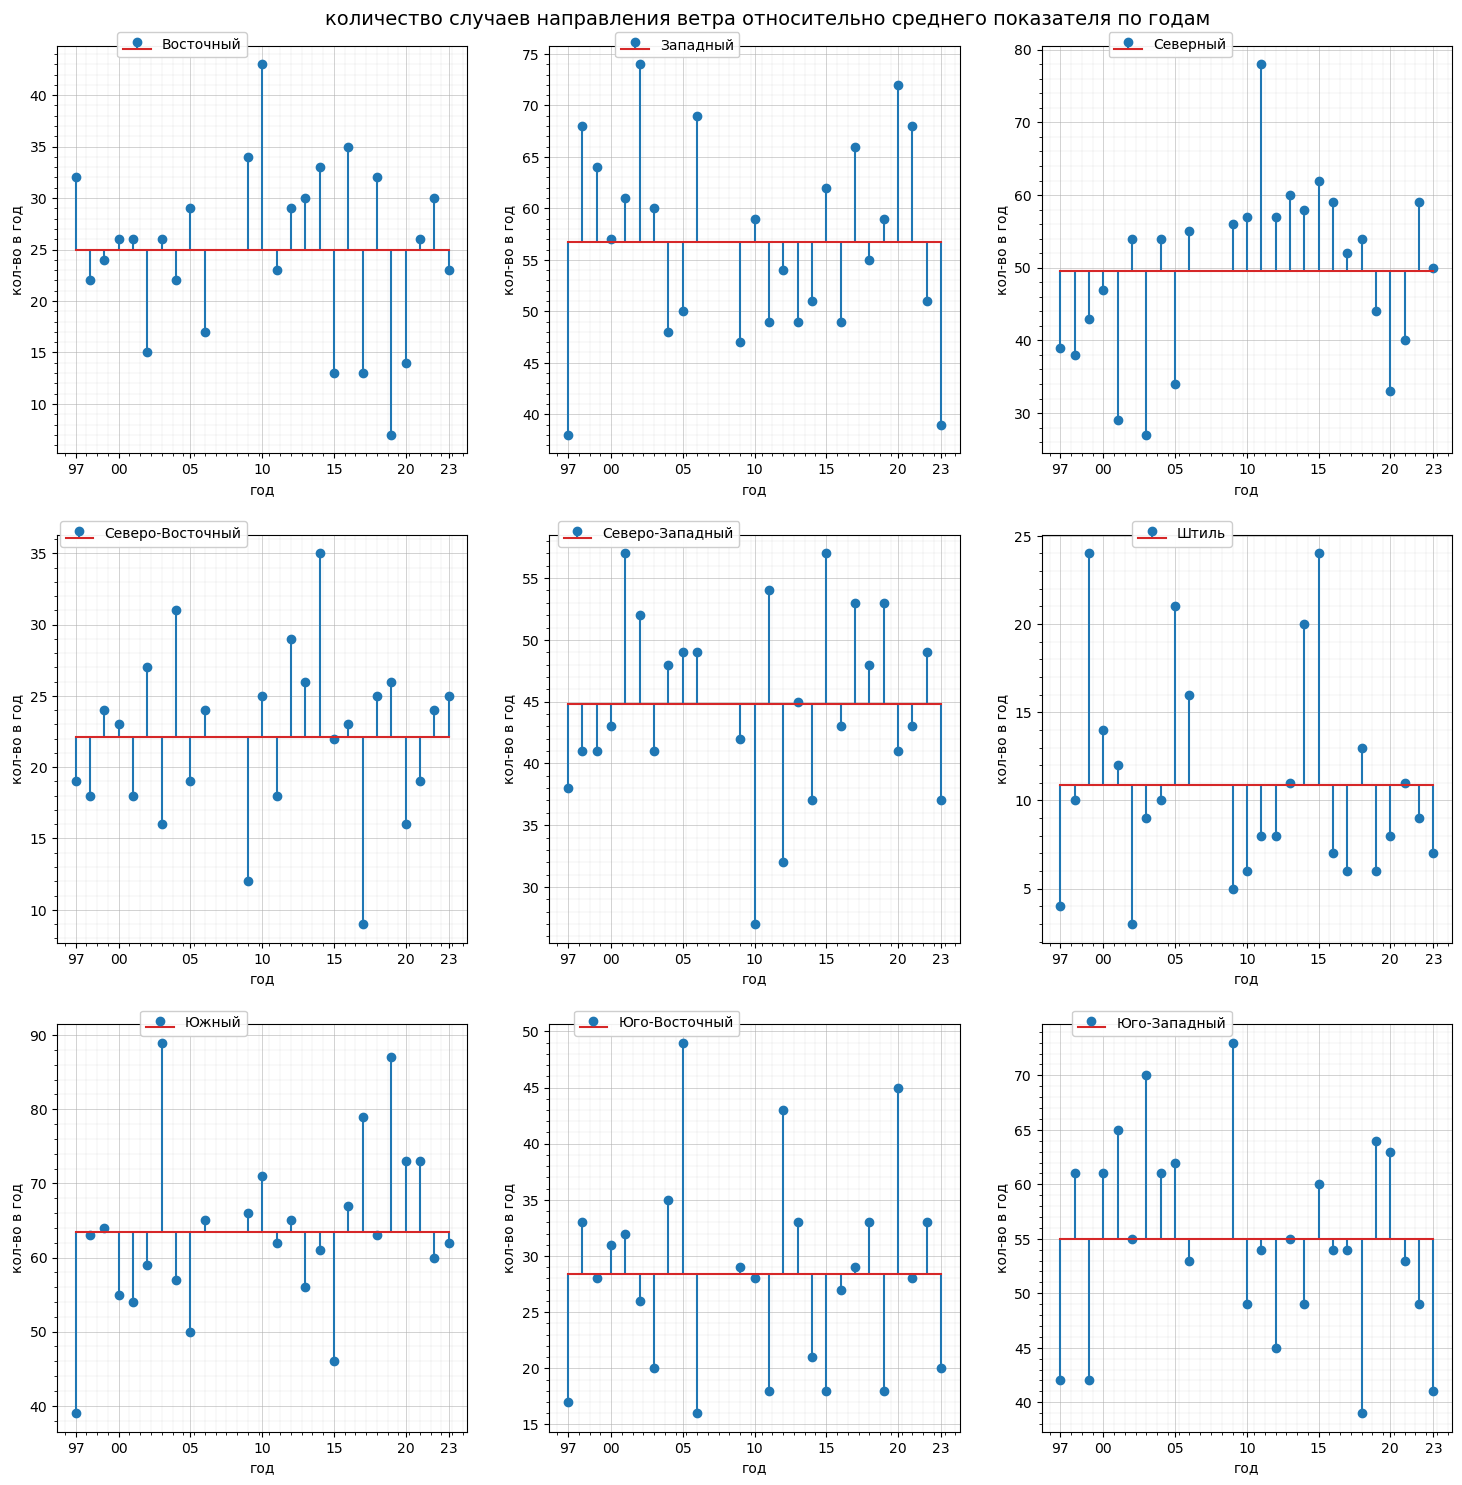

In [26]:
fig6 = plt.figure(figsize=(18, 18))
fig6.suptitle("количество случаев направления ветра относительно среднего показателя по годам",x=0.52,y=0.90, fontsize=14)
num = 1
for i in ydc.columns[:9]:
    ax_ydc = fig6.add_subplot(3,3,num)     
    ax_ydc.stem(ydc[i].index, ydc[i].values, bottom=ydc[i].mean(), label=directs[num-1])
    num += 1
    ax_ydc.legend(bbox_to_anchor=(0., 0.95, 0.48, .100), framealpha=0.95)
    ax_ydc.grid()
    ax_ydc.xaxis.set_major_locator(FixedLocator([1997, 2000, 2005, 2010, 2015, 2020, 2023]))
    ax_ydc.xaxis.set_major_formatter(FixedFormatter(["97", "00", "05", "10", "15", "20", "23"]))
    ax_ydc.minorticks_on()
    ax_ydc.grid(which='minor', lw=0.1)
    ax_ydc.grid(which='major', lw=0.4)
    ax_ydc.set_xlabel('год')
    ax_ydc.set_ylabel('кол-во в год')   

### 1.7 каждое направление относительно себя по месяцам в процентном отношении

In [27]:
# # подсчет количества направлений ветра в каждом месяце
# monthdircount = data.pivot_table(values='day', index='month', columns='wdird', aggfunc='count')
# # добавить столбцы с переводом количества случаев в процент
# for i in monthdircount.columns:
#     monthdircount[f'{i}%'] = monthdircount[i].apply(lambda col: round(col/monthdircount[i].sum()*100, 2))   

In [28]:
# monthdircount.to_json('napravlenie_vetrov/new_monthdircount.json')

In [29]:
mdc = pd.read_json('napravlenie_vetrov/new_monthdircount.json')

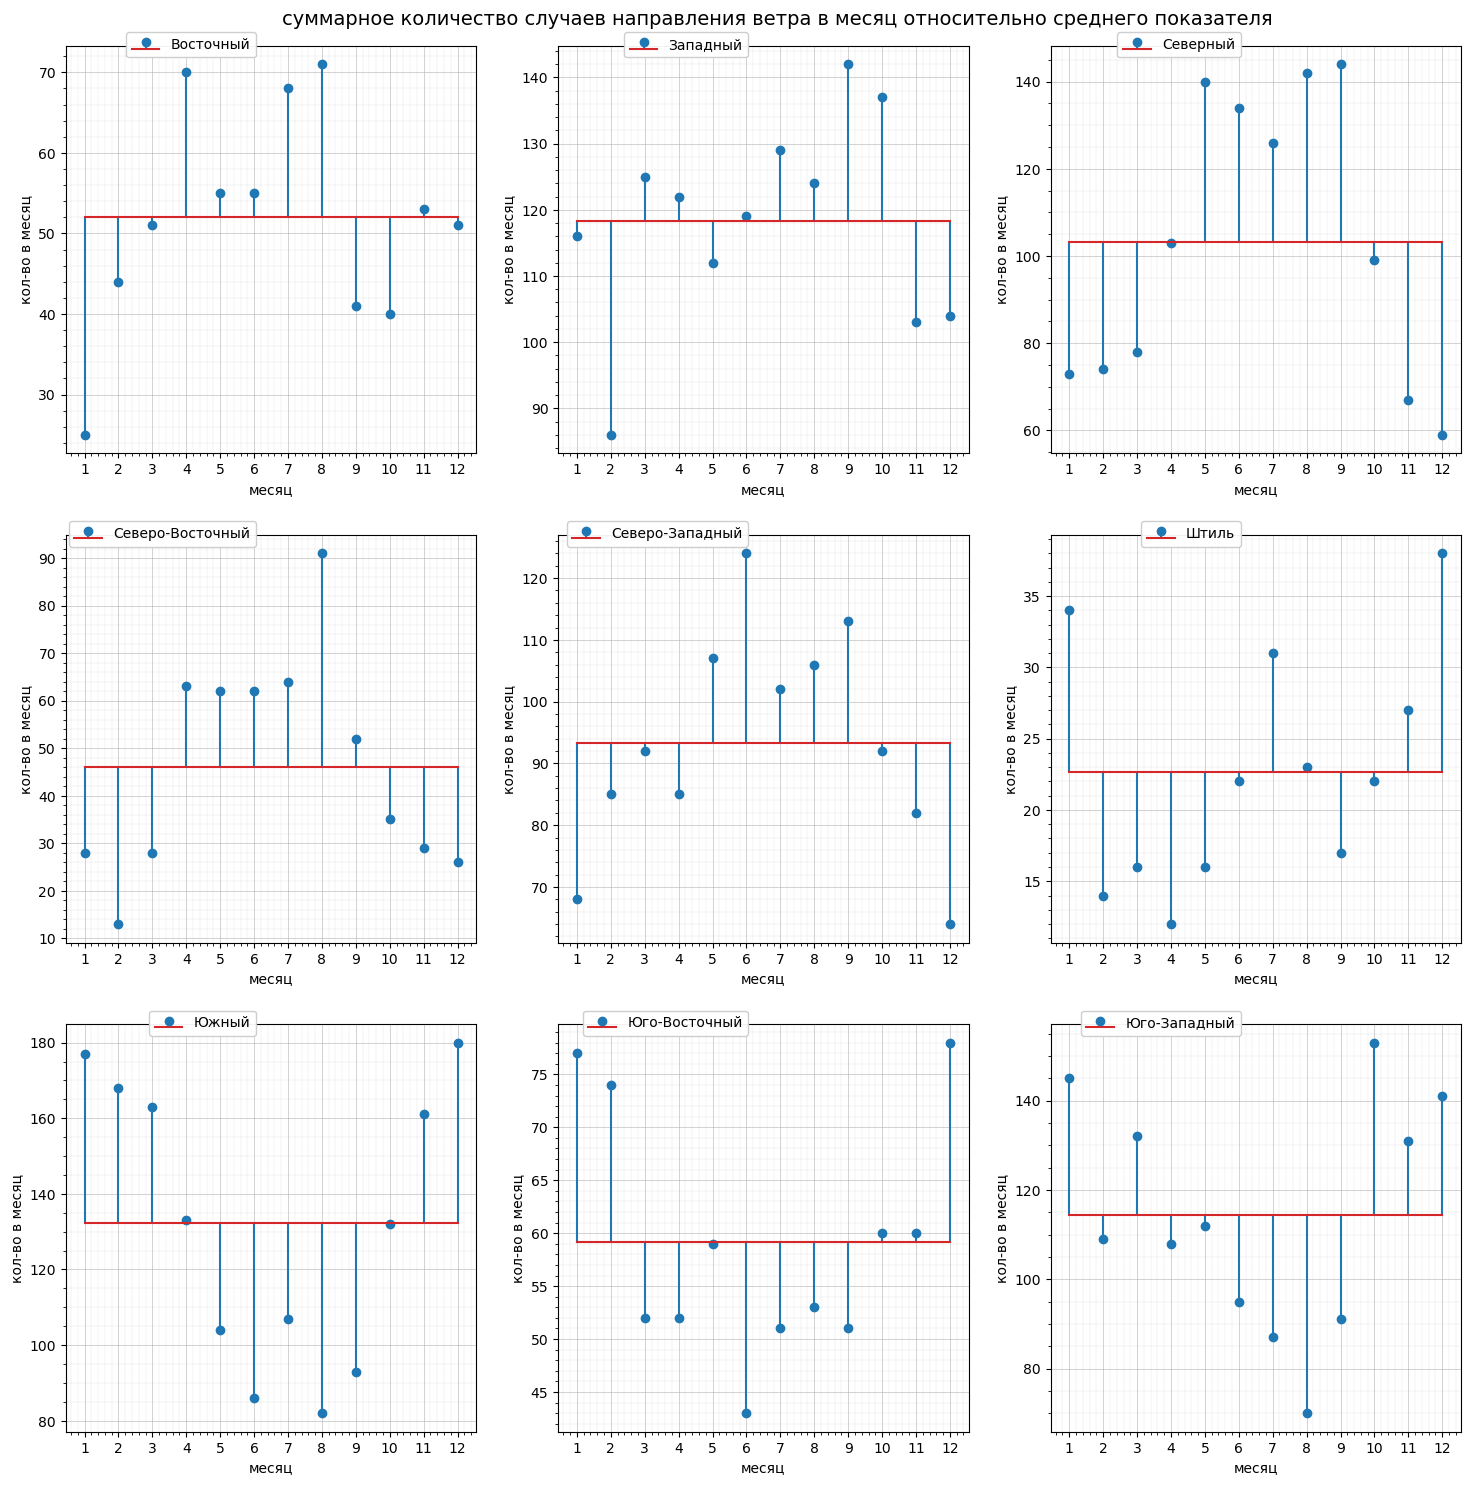

In [30]:
fig7 = plt.figure(figsize=(18, 18))
fig7.suptitle("суммарное количество случаев направления ветра в месяц относительно среднего показателя",x=0.52,y=0.90, fontsize=14)
num = 1
for i in mdc.columns[:9]:
    ax_mdc = fig7.add_subplot(3,3,num)     
    ax_mdc.stem(mdc[i].index, mdc[i].values, bottom=mdc[i].mean(), label = directs[num-1])
    num += 1
    ax_mdc.legend(bbox_to_anchor=(0., 0.95, 0.48, .100), framealpha=0.95)
    ax_mdc.grid()
    ax_mdc.xaxis.set_major_locator(FixedLocator(np.arange(13)))
    ax_mdc.xaxis.set_major_formatter(FixedFormatter(np.arange(13)))
    ax_mdc.minorticks_on()
    ax_mdc.grid(which='minor', lw=0.1)
    ax_mdc.grid(which='major', lw=0.4)
    ax_mdc.set_xlabel('месяц')
    ax_mdc.set_ylabel('кол-во в месяц')   

###### смотрим на максимальную продолжительность ветра в одном направлении

In [31]:
# собирает дату из трех столбцов
def chislo(row):
    year = row.values[0]
    if row.values[1] < 10:
        month = row.values[1]
        month = f'0{month}'
    else:
        month = row.values[1]
        
    if row.values[2] < 10:
        day = row.values[2]
        day = f'0{day}'
    else:
        day = row.values[2]    
    return f'{year}-{month}-{day}'

maxwdir = data[['year', 'month', 'day', 'wdird']].copy()
maxwdir = maxwdir.assign(date = maxwdir.apply(chislo, axis=1))
# maxwdir.date = pd.to_datetime(maxwdir.date, format='%Y-%m-%d')

In [32]:
records, direction = [], maxwdir['wdird'].values[1]
x, maxi = 1, 0
mw = maxwdir[['wdird', 'date']].values
for i in range(1, len(mw)):
    if mw[i][0] == direction:
        x += 1
    elif x >= maxi:
        maxi = x        
        records.append([direction, maxi, mw[i-maxi][1], mw[i-1][1]])
        direction = mw[i][0]        
        x = 1     
    elif x < maxi:
        direction = mw[i][0]
        x = 1
    if i + 1 == len(mw) and x >= maxi:
        records.append([direction, maxi, mw[i-maxi][1], mw[i-1][1]])
if records[-1][1] == records[-2][1]:
    ret = records[-1:-3:-1]
    for i in records[-3:: -1]:
        if i[1] == ret[0][1]:
            ret.append(i)
        elif i[1] < ret[0][1]:
            break
    for i in ret:
        print(f'наибольшая продолжительность ветра в одном направлении составляет {i[1]} дней(дня),\n\
ветер в {i[0]} направлении был с {i[2]} по {i[3]}')
else:
     print(f'наибольшая продолжительность ветра в одном направлении составляет {records[-1][1]} дней(дня),\n\
ветер в {records[-1][0]} направлении был с {records[-1][2]} по {records[-1][3]}')

наибольшая продолжительность ветра в одном направлении составляет 9 дней(дня),
ветер в Ю направлении был с 2020-10-05 по 2020-10-13
